<a href="https://colab.research.google.com/github/LoTzuChin/113-1-FinancialBigData/blob/main/week03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
!pip install DateTime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 9.6 MB/s eta 0:00:00


In [5]:
import yfinance as yf
import pandas as pd
import datetime as dt

stock_id = '2330.tw'

end = dt.date.today()

start = end - dt.timedelta(days=240)

df = yf.download(stock_id, start = start, end = end).reset_index()

df

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-02-05,645.0,647.0,638.0,646.0,637.678162,44017740
1,2024-02-15,709.0,709.0,693.0,697.0,688.021179,112945296
2,2024-02-16,697.0,699.0,683.0,683.0,674.201538,44232811
3,2024-02-19,674.0,682.0,674.0,678.0,669.265991,34408673
4,2024-02-20,675.0,688.0,675.0,687.0,678.150024,30166461
...,...,...,...,...,...,...,...
151,2024-09-24,976.0,987.0,971.0,987.0,987.000000,26785975
152,2024-09-25,1000.0,1005.0,998.0,1005.0,1005.000000,39405222
153,2024-09-26,1010.0,1015.0,1005.0,1015.0,1015.000000,38321585
154,2024-09-27,1020.0,1025.0,1000.0,1000.0,1000.000000,35783779


**1.1 計算SMA**

In [6]:
df['5_SMA'] = df['Close'].rolling(window=5).mean()

df['10_SMA'] = df['Close'].rolling(window=10).mean()

df['20_SMA'] = df['Close'].rolling(window=20).mean()

df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,5_SMA,10_SMA,20_SMA
151,2024-09-24,976.0,987.0,971.0,987.0,987.0,26785975,967.6,947.7,938.30
152,2024-09-25,1000.0,1005.0,998.0,1005.0,1005.0,39405222,980.4,957.8,941.45
153,2024-09-26,1010.0,1015.0,1005.0,1015.0,1015.0,38321585,991.4,969.2,944.00
154,2024-09-27,1020.0,1025.0,1000.0,1000.0,1000.0,35783779,996.8,975.2,946.85
155,2024-09-30,978.0,990.0,957.0,957.0,957.0,61603217,992.8,976.2,947.50


**1.2 計算RSI**

In [8]:
df['Change'] = df['Close'] - df['Close'].shift(1)

df['Gain'] = df['Change'].apply(lambda x: x if x > 0 else 0)

df['Loss'] = df['Change'].apply(lambda x: -x if x < 0 else 0)

df.tail()

df['Avg_Gain'] = df['Gain'].rolling(window=14).mean()

df['Avg_Loss'] = df['Loss'].rolling(window=14).mean()

df['RS'] = df['Avg_Gain'] / df['Avg_Loss']

df['RSI'] = 100 - (100 / (1 + df['RS']))

df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,5_SMA,10_SMA,20_SMA,Change,Gain,Loss,Avg_Gain,Avg_Loss,RS,RSI
151,2024-09-24,976.0,987.0,971.0,987.0,987.0,26785975,967.6,947.7,938.30,10.0,10.0,0.0,9.000000,5.642857,1.594937,61.463415
152,2024-09-25,1000.0,1005.0,998.0,1005.0,1005.0,39405222,980.4,957.8,941.45,18.0,18.0,0.0,10.285714,2.000000,5.142857,83.720930
153,2024-09-26,1010.0,1015.0,1005.0,1015.0,1015.0,38321585,991.4,969.2,944.00,10.0,10.0,0.0,10.071429,2.000000,5.035714,83.431953
154,2024-09-27,1020.0,1025.0,1000.0,1000.0,1000.0,35783779,996.8,975.2,946.85,-15.0,0.0,15.0,8.928571,3.071429,2.906977,74.404762
155,2024-09-30,978.0,990.0,957.0,957.0,957.0,61603217,992.8,976.2,947.50,-43.0,0.0,43.0,8.928571,4.785714,1.865672,65.104167


**1.3 計算MACD**

In [11]:
df['26_EMA'] = df['Close'].ewm(span=26).mean()

df['12_EMA'] = df['Close'].ewm(span=12).mean()

df['MACD'] = df['12_EMA'] - df['26_EMA']

df.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume,5_SMA,10_SMA,20_SMA,...,Gain,Loss,Avg_Gain,Avg_Loss,RS,RSI,26_EMA,12_EMA,MACD,Signal_Line
0,2024-02-05,645.0,647.0,638.0,646.0,637.678162,44017740,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,646.000000,646.000000,0.000000,0.000000
1,2024-02-15,709.0,709.0,693.0,697.0,688.021179,112945296,NaN,NaN,NaN,...,51.0,0.0,NaN,NaN,NaN,NaN,672.480769,673.625000,1.144231,0.635684
2,2024-02-16,697.0,699.0,683.0,683.0,674.201538,44232811,NaN,NaN,NaN,...,0.0,14.0,NaN,NaN,NaN,NaN,676.260227,677.284065,1.023838,0.794763


**2. 可視化k線圖**

In [12]:
! pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.6 MB/s eta 0:00:00


In [13]:
k_plot_df = df.set_index('Date')
k_plot_df['2024-08-01': '2024-09-30'].tail()

,Open,High,Low,Close,Adj Close,Volume,5_SMA,10_SMA,20_SMA,Change,Gain,Loss,Avg_Gain,Avg_Loss,RS,RSI,26_EMA,12_EMA,MACD,Signal_Line
Date,,,,,,,,,,,,,,,,,,,,
2024-09-24,976.0,987.0,971.0,987.0,987.0,26785975,967.6,947.7,938.30,10.0,10.0,0.0,9.000000,5.642857,1.594937,61.463415,945.271014,952.986062,7.715047,-0.103274
2024-09-25,1000.0,1005.0,998.0,1005.0,1005.0,39405222,980.4,957.8,941.45,18.0,18.0,0.0,10.285714,2.000000,5.142857,83.720930,949.695418,960.988206,11.292788,2.175938
2024-09-26,1010.0,1015.0,1005.0,1015.0,1015.0,38321585,991.4,969.2,944.00,10.0,10.0,0.0,10.071429,2.000000,5.035714,83.431953,954.532829,969.297713,14.764884,4.693727
2024-09-27,1020.0,1025.0,1000.0,1000.0,1000.0,35783779,996.8,975.2,946.85,-15.0,0.0,15.0,8.928571,3.071429,2.906977,74.404762,957.900789,974.021142,16.120352,6.979052
2024-09-30,978.0,990.0,957.0,957.0,957.0,61603217,992.8,976.2,947.50,-43.0,0.0,43.0,8.928571,4.785714,1.865672,65.104167,957.834064,971.402504,13.568440,8.296930


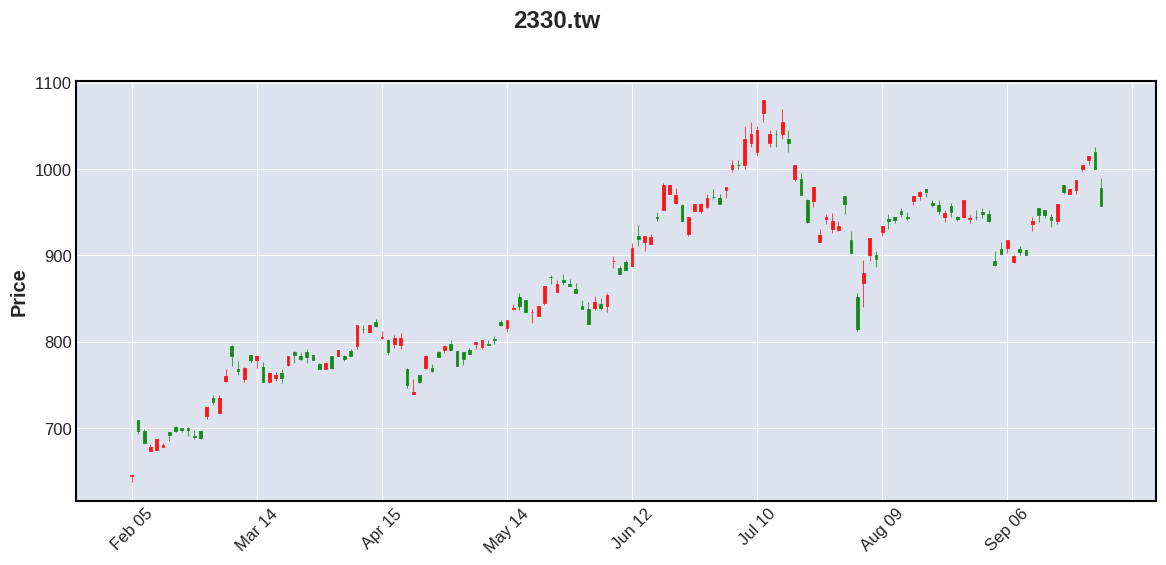

In [14]:
import mplfinance as mpf

my_color = mpf.make_marketcolors(up='r', down='g', inherit=True)

my_style = mpf.make_mpf_style(base_mpf_style='default', marketcolors=my_color)

mpf.plot(k_plot_df, type='candle', style=my_style, title=f'{stock_id}', figsize=(15, 6))

3. **資料預處理**

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

n = 1
df['Future_Price'] = df['Close'].shift(-n)

df.dropna(inplace=True)

x = df[['20_SMA', 'RSI', 'MACD']]

y = df['Future_Price']

x.shape, y.shape

((134, 3), (134,))

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((107, 3), (27, 3), (107,), (27,))

**3.1 線性回歸**

In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

print(f'RMSE: {rmse}')

feture_pred = model.predict(x[-1:])

print(f'預測股價: {feture_pred[0]}')

RMSE: 33.43981158484402
預測股價: 999.2278388514455


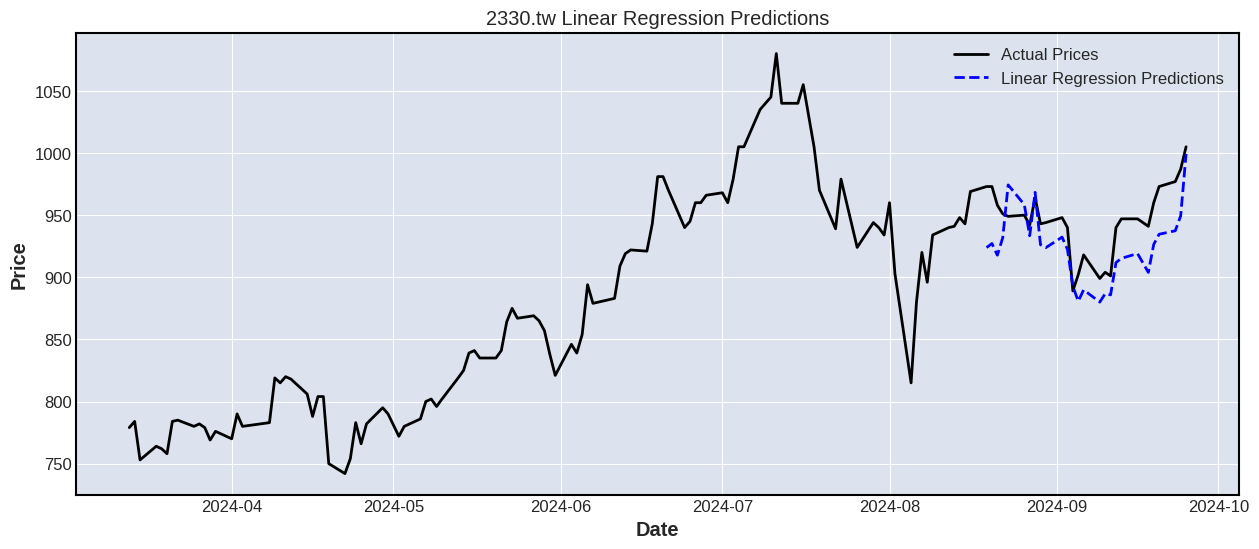

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df['Date'][-len(y_test):], y_pred, label='Linear Regression Predictions', linestyle='--', color='blue')
plt.title(f'{stock_id} Linear Regression Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

**3.2 決策樹**

In [25]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

print(f'RMSE: {rmse}')

feture_pred = model.predict(x[-1:])

print(f'預測股價: {feture_pred[0]}')

RMSE: 39.18427500168157
預測股價: 948.0


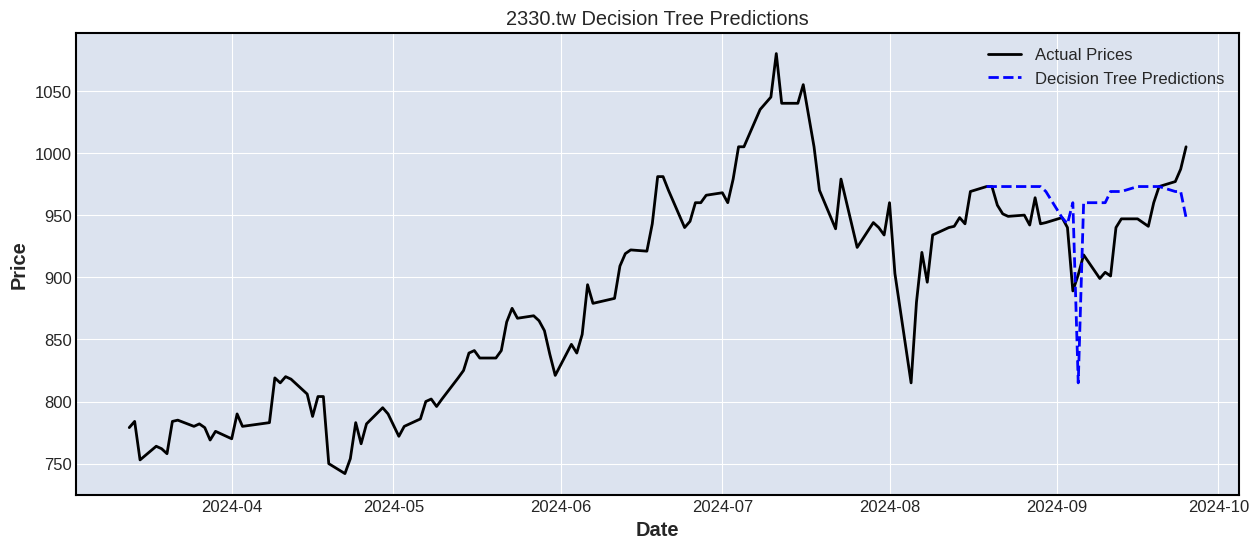

In [26]:
plt.figure(figsize=(15, 6))
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df['Date'][-len(y_test):], y_pred, label='Decision Tree Predictions', linestyle='--', color='blue')
plt.title(f'{stock_id} Decision Tree Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

**3.3 隨機森林**

In [27]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

print(f'RMSE: {rmse}')

feture_pred = model.predict(x[-1:])

print(f'預測股價: {feture_pred[0]}')

RMSE: 28.286091792414318
預測股價: 953.32


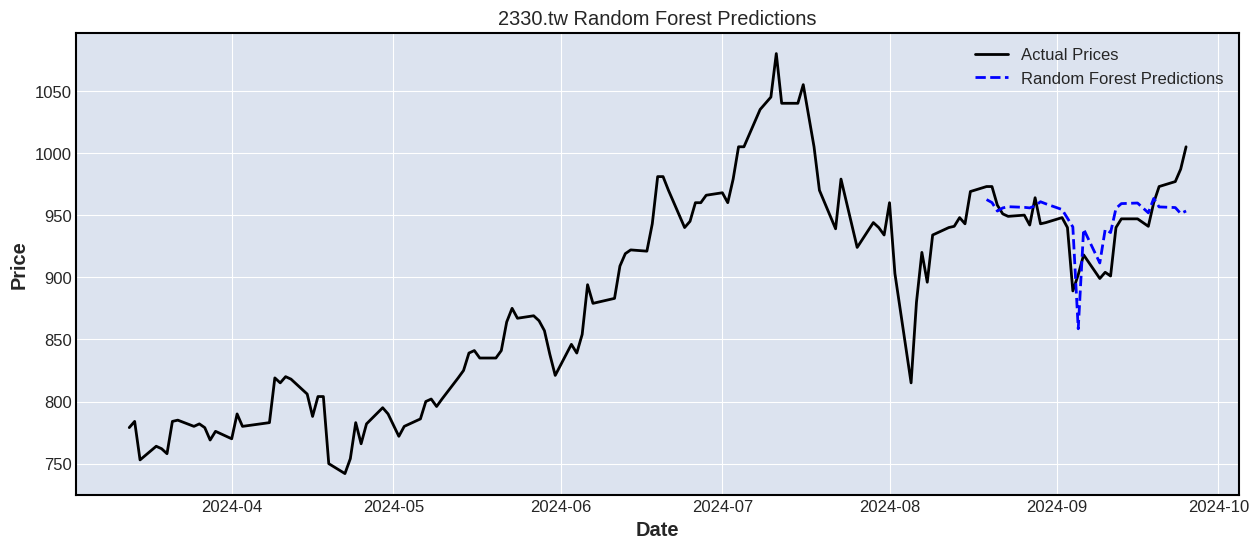

In [28]:
plt.figure(figsize=(15, 6))
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df['Date'][-len(y_test):], y_pred, label='Random Forest Predictions', linestyle='--', color='blue')
plt.title(f'{stock_id} Random Forest Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()